<a href="https://colab.research.google.com/github/satyajitghana/TSAI-DeepVision-EVA4.0/blob/master/13_YoloV3/YoloV3-BugsBunny.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YoloV3 on Custom Data

## Make sure you have a Tesla-P100

In [0]:
!nvidia-smi

Sun Apr 26 10:48:22 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P0    31W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

## Mount your google drive to save the weights

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
cd /content/drive/My\ Drive/YoloV3-TSAI

/content/drive/My Drive/YoloV3-TSAI


In [0]:
ls

annotation_tool/  output/       test_batch0.png   weights/
cfg/              README.md     test.py           YoloV3_Annotation_Tool/
data/             results.json  train_batch0.png
detect.py         results.png   train.py
models.py         results.txt   utils/


## Unzip your custom data

In [0]:
!unzip data/customdata.zip -d data/
!unzip data/whats-up-doc.zip -d data/

### Imports

In [0]:
import time
import glob
import torch
import os

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.4.0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', major=6, minor=0, total_memory=16280MB, multi_processor_count=56)


## Check if the network trains

In [0]:
!python train.py --data data/smalcoco/smalcoco.data --batch 3 --cache --epochs 3 --nosave

Namespace(accumulate=4, adam=False, batch_size=3, bucket='', cache_images=True, cfg='cfg/yolov3-spp.cfg', data='data/smalcoco/smalcoco.data', device='', epochs=3, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

2020-04-26 10:50:59.218958: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0   2582      0 --:--:-- --:--:-- --:--:--  2582
  0     0    0     0    0     0     

# Train the Network on Custom Data

In [15]:
!python train.py --data data/customdata/custom.data --batch 10 --cache --cfg cfg/yolov3-custom.cfg --epochs 300 --nosave

Namespace(accumulate=4, adam=False, batch_size=10, bucket='', cache_images=True, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', device='', epochs=300, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

2020-04-26 12:42:47.372054: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
Caching labels (535 found, 0 missing, 0 empty, 0 duplicate, for 535 images): 100% 535/535 [00:00<00:00, 644.87it/s]
Caching images (0.3GB): 100% 535/535 [00:03<00:00, 151.50it/s]
Caching labels (59 found, 0 missing, 0 empty, 0 duplicate, for 59 images): 100% 59/59 [0

In [16]:
ls

annotation_tool/  out_out/      results.png      train_batch0.png
cfg/              output/       results.txt      train.py
data/             __pycache__/  runs/            utils/
detect.py         README.md     test_batch0.png  weights/
models.py         results.json  test.py          YoloV3_Annotation_Tool/


In [17]:
ls -l weights

total 491154
-rw------- 1 root root 250642918 Apr 26 15:52 last.pt
-rw------- 1 root root 252297867 Apr 26 10:51 yolov3-spp-ultralytics.pt


In [21]:
!date

Sun Apr 26 15:54:17 UTC 2020


## Model run on images

Run this cell block after running the cell succedding this cell block to generate the images

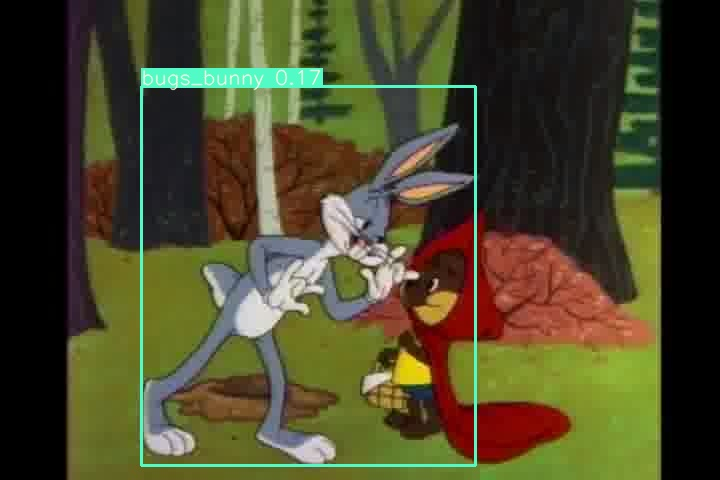

In [24]:
Image(filename='out_out/image_947.jpg', width=600)

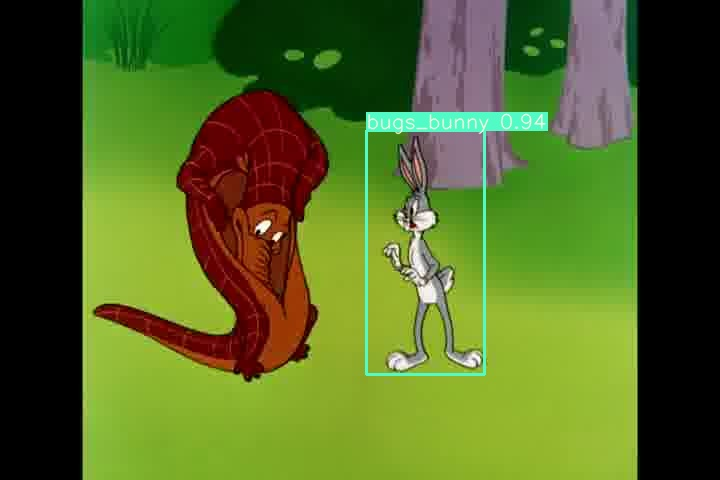

In [25]:
Image(filename='out_out/image_3515.jpg', width=600)

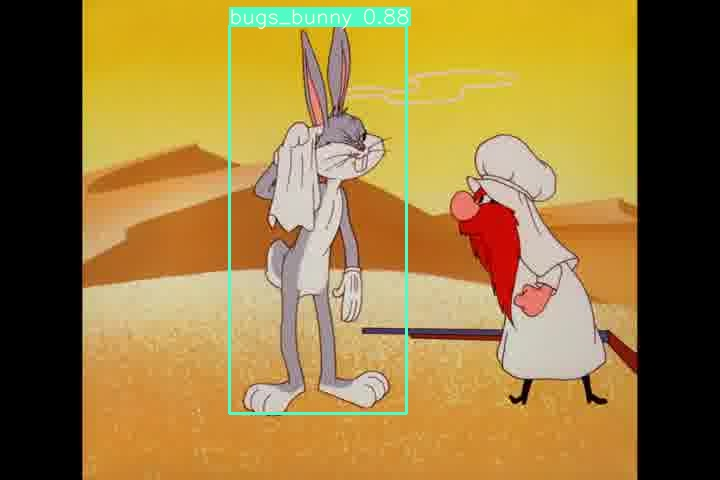

In [26]:
Image(filename='out_out/image_3190.jpg', width=600)

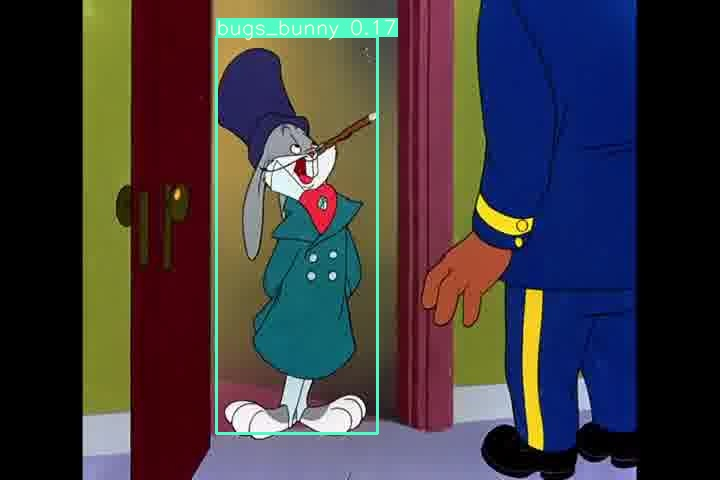

In [27]:
Image(filename='out_out/image_2955.jpg', width=600)

## Run a image folder through the model

In [22]:
!python detect.py --source data/whats-up-doc/ --conf-thres 0.1 --output out_out

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='out_out', save_txt=False, source='data/whats-up-doc/', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
image 1/4556 data/whats-up-doc/image_001.jpg: 384x512 Done. (0.020s)
image 2/4556 data/whats-up-doc/image_002.jpg: 384x512 Done. (0.024s)
image 3/4556 data/whats-up-doc/image_003.jpg: 384x512 Done. (0.023s)
image 4/4556 data/whats-up-doc/image_004.jpg: 384x512 Done. (0.021s)
image 5/4556 data/whats-up-doc/image_005.jpg: 384x512 Done. (0.018s)
image 6/4556 data/whats-up-doc/image_006.jpg: 384x512 Done. (0.017s)
image 7/4556 data/whats-up-doc/image_007.jpg: 384x512 Done. (0.026s)
image 8/4556 data/whats-up-doc/image

## Run a video through the model

In [23]:
!python detect.py --source data/Eh-Whats-Up-Doc-Looney-Tuesdays.mp4 --conf-thres 0.1 --output out_video

Streaming output truncated to the last 5000 lines.
video 1/1 (466/5462) data/Eh-Whats-Up-Doc-Looney-Tuesdays.mp4: 320x512 1 bugs_bunnys, Done. (0.020s)
video 1/1 (467/5462) data/Eh-Whats-Up-Doc-Looney-Tuesdays.mp4: 320x512 1 bugs_bunnys, Done. (0.017s)
video 1/1 (468/5462) data/Eh-Whats-Up-Doc-Looney-Tuesdays.mp4: 320x512 1 bugs_bunnys, Done. (0.018s)
video 1/1 (469/5462) data/Eh-Whats-Up-Doc-Looney-Tuesdays.mp4: 320x512 1 bugs_bunnys, Done. (0.018s)
video 1/1 (470/5462) data/Eh-Whats-Up-Doc-Looney-Tuesdays.mp4: 320x512 1 bugs_bunnys, Done. (0.016s)
video 1/1 (471/5462) data/Eh-Whats-Up-Doc-Looney-Tuesdays.mp4: 320x512 1 bugs_bunnys, Done. (0.017s)
video 1/1 (472/5462) data/Eh-Whats-Up-Doc-Looney-Tuesdays.mp4: 320x512 1 bugs_bunnys, Done. (0.016s)
video 1/1 (473/5462) data/Eh-Whats-Up-Doc-Looney-Tuesdays.mp4: 320x512 1 bugs_bunnys, Done. (0.020s)
video 1/1 (474/5462) data/Eh-Whats-Up-Doc-Looney-Tuesdays.mp4: 320x512 1 bugs_bunnys, Done. (0.019s)
video 1/1 (475/5462) data/Eh-Whats-Up-Do